# Training(1)
and write(save) the tree to pickle 

In [101]:
import pickle
from pforest.master import master
m=master(dsetname='CS213')
m.reset()
m.train()
with open('CS213/out_tree1.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)


master>>init() dsetname: CS213
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['CS213/dataset00.pic', 'CS213/dataset01.pic', 'CS213/dataset02.pic', 'CS213/dataset03.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.8257
master>>reset() Q: 00612
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17RG
master::train() node17LG
master::train() node18L-
master::train() node17R-
master::train() node16RG
master::train() node16L-
master::train() node15RG
master::train() node15L-
master::train() node14R-
master::train() node13R-
master::train() node12R-
master::train() node11RG
master::train() node11L-
master::train() node10R-
master::train() node9RG
master::train() node9L-
master::train() node8RG
master::train() node8LQ
master::train() node10LG
master::train() node12LQ
master::train() node13LQ
master::train() node14LG
master::train() node17L-
master::train() node16R-
master::train() node15RQ
mas

# Read the tree 
The result decision tree

In [102]:
from pforest.dataset import dataset
from pforest.tree import tree
with open('CS213/out_tree1.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)
#init the test tree
t=tree()
t.settree(root)
t.show()

*- 20 H:2.826e+00,Q:000612 tau:10.0 theta:[ 19.]
L- 19 H:2.660e+00,Q:000357 tau:6.0 theta:[ 25.]
L- 18 H:2.573e+00,Q:000258 tau:11.0 theta:[ 20.]
L- 17 H:2.433e+00,Q:000222 tau:8.0 theta:[ 22.]
L- 16 H:2.342e+00,Q:000089 tau:3.0 theta:[ 97.]
L- 15 H:2.169e+00,Q:000070 tau:11.0 theta:[ 189.]
L- 14 H:1.972e+00,Q:000048 tau:9.0 theta:[ 161.]
L- 13 H:1.994e+00,Q:000044 tau:9.0 theta:[ 196.]
LG 12 H:1.344e+00,Q:000008 (cl,P):(008,0.38) (011,0.25) (010,0.12)
R- 12 H:1.772e+00,Q:000036 tau:9.0 theta:[ 20.]
L- 11 H:1.488e+00,Q:000024 tau:12.0 theta:[ 179.]
L- 10 H:1.285e+00,Q:000019 tau:11.0 theta:[ 169.]
L- 09 H:1.275e+00,Q:000015 tau:7.0 theta:[ 125.]
LG 08 H:1.201e+00,Q:000013 (cl,P):(006,0.31) (008,0.23) (009,0.15)
RQ 08 H:1.925e-35,Q:000002 (cl,P):(009,0.50) (005,0.50) (013,0.00)
RG 09 H:5.000e-01,Q:000004 (cl,P):(009,0.25) (008,0.25) (007,0.25)
RG 10 H:1.371e+00,Q:000005 (cl,P):(009,0.60) (008,0.20) (007,0.20)
RG 11 H:1.471e+00,Q:000012 (cl,P):(007,0.42) (008,0.25) (011,0.08)
RG 13 H:6.8

# Test Classify(1)
zeros(no register) is training data

In [103]:
import numpy as np
u=np.zeros(203)
Prob=t.classify(u)

In [104]:
Prob


array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.125,  0.   ,  0.125,
        0.375,  0.   ,  0.125,  0.25 ,  0.   ,  0.   ])

In [105]:
predictedGrade=np.argmax(Prob)

In [106]:
Grade=['A', 'B+', 'B', 'C+', 'C' , 'D+' , 'D' , 'F' , 'W' , 'S' , 'S#' , 'U' , 'U#']
Grade[predictedGrade]

'W'

# Import file transform.xlsx

In [107]:
import pandas as pd
df_file = pd.read_excel('../src/transform.xlsx')
df_file = df_file.fillna(0)
df_file = df_file.replace(['A', 'B+', 'B', 'C+', 'C' , 'D+' , 'D' , 'F' , 'W' , 'S' , 'S#' , 'U' , 'U#'], 
                     [13, 12, 11, 10 , 9, 8, 7, 6, 5, 4, 3, 2, 1])
df_file_new = df_file.drop(['0STUDENTID','1ACADYEAR','2SEMESTER','3COURSEID','4RESULT'],1)



#### classify one column from transform.xlsx

In [108]:
df_file16 = df_file_new[16:17]
import numpy as np
u = df_file16.as_matrix()[0]
Prob=t.classify(u)

In [109]:
u

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,   9.,   0.,
         8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,
         6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [110]:
u.shape

(203L,)

In [111]:
Prob

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.18181818,  0.36363636,  0.09090909,  0.36363636,
        0.        ,  0.        ,  0.        ,  0.        ])

In [112]:
predictedGrade=np.argmax(Prob)
print predictedGrade

7


In [113]:
Grade=['A', 'B+', 'B', 'C+', 'C' , 'D+' , 'D' , 'F' , 'W' , 'S' , 'S#' , 'U' , 'U#','na']
Grade[::-1][predictedGrade]

'D'

In [114]:
df_file[16:17]

,0STUDENTID,1ACADYEAR,2SEMESTER,3COURSEID,4RESULT,AN201,AS171,AS177,AS178,AT207,...,TU113,TU115,TU116,TU120,TU121,TU122,TU130,TU153,TU154,TU156
16,316644,2553,1,CS213,9,0,0,0,0,0,...,0,0,0,8,0,12,11,0,7,0


In [115]:
df_file[123:124]

,0STUDENTID,1ACADYEAR,2SEMESTER,3COURSEID,4RESULT,AN201,AS171,AS177,AS178,AT207,...,TU113,TU115,TU116,TU120,TU121,TU122,TU130,TU153,TU154,TU156
123,321848,2553,1,CS213,10,0,0,0,0,0,...,0,0,0,8,0,0,0,0,13,0


In [116]:
df_file[415:416]

,0STUDENTID,1ACADYEAR,2SEMESTER,3COURSEID,4RESULT,AN201,AS171,AS177,AS178,AT207,...,TU113,TU115,TU116,TU120,TU121,TU122,TU130,TU153,TU154,TU156
415,329171,2554,2,CS213,11,0,0,0,0,0,...,0,0,0,10,0,0,11,0,8,0


# Read(load) tree from pickle to classify

In [119]:
with open('CS213/dataset04.pic', 'rb') as pickleFile:
     data = pickle.load(pickleFile)

In [120]:
I=data[-2];L=data[-3]

#### Check the file size

In [121]:
ls train

 Volume in drive D is DATA
 Volume Serial Number is E617-8A3A

 Directory of D:\project\forcast\src\train

04/07/2016  05:03 PM    <DIR>          .
04/07/2016  05:03 PM    <DIR>          ..
04/07/2016  05:53 PM           249,910 dataset00.pic
04/07/2016  05:53 PM           249,910 dataset01.pic
04/07/2016  05:53 PM           249,910 dataset02.pic
04/07/2016  05:53 PM           249,910 dataset03.pic
04/07/2016  05:53 PM           249,910 dataset04.pic
04/07/2016  05:06 PM           160,983 out_tree.pic
04/07/2016  03:37 PM            44,363 out_tree1.pic
04/07/2016  03:43 PM            42,899 out_tree2.pic
04/07/2016  03:46 PM            42,905 out_tree3.pic
04/07/2016  04:00 PM            45,815 out_tree4.pic
04/07/2016  04:04 PM            48,779 out_tree5.pic
              11 File(s)      1,635,294 bytes
               2 Dir(s)  258,435,641,344 bytes free


In [122]:
I

array([[ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       ..., 
       [ 0,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [123]:
I.shape

(153L, 203L)

In [124]:
L

array([ 6,  8,  6,  9,  6, 10,  7,  9,  6, 13,  5,  9,  6,  5,  9,  9,  6,
        9,  8,  8,  6,  9,  6, 13,  6, 13, 13, 13, 13,  6,  6, 10,  6,  6,
        8,  7,  7,  6,  8, 12,  6,  9, 13,  7, 10,  6,  6, 10,  6,  6, 13,
        6,  6,  8,  7,  6,  6,  9,  7,  7,  7,  6,  6, 12,  7,  7,  6,  6,
        6,  9,  8,  6, 11,  7, 10,  6,  7, 10,  8, 10,  7,  7,  6, 11,  6,
        6,  6,  6,  6,  6,  7,  6,  7,  6,  7, 13,  8, 12,  8, 13,  6,  8,
        9, 13,  8,  6,  6,  6,  6,  8,  6, 13,  6,  6,  6,  7,  6,  8,  6,
        6,  6,  5,  7,  6, 11,  6,  6,  6,  5,  7,  6,  8,  6,  6,  6,  6,
        6,  5,  6,  8,  6,  6,  5,  6,  7,  6,  7,  5,  6,  5,  7,  7,  7], dtype=int64)

In [125]:
L.shape

(153L,)

# Show prediction compare with actual 

In [126]:
i=0
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predictedGrade=np.argmax(Prob)
    print "actual grade:%d predicted grade:%d"%(L[i],predictedGrade)

actual grade:6 predicted grade:7
actual grade:8 predicted grade:6
actual grade:6 predicted grade:5
actual grade:9 predicted grade:9
actual grade:6 predicted grade:9
actual grade:10 predicted grade:9
actual grade:7 predicted grade:7
actual grade:9 predicted grade:8
actual grade:6 predicted grade:5
actual grade:13 predicted grade:13
actual grade:5 predicted grade:9
actual grade:9 predicted grade:9
actual grade:6 predicted grade:5
actual grade:5 predicted grade:6
actual grade:9 predicted grade:8
actual grade:9 predicted grade:5
actual grade:6 predicted grade:9
actual grade:9 predicted grade:6
actual grade:8 predicted grade:9
actual grade:8 predicted grade:9
actual grade:6 predicted grade:6
actual grade:9 predicted grade:9
actual grade:6 predicted grade:6
actual grade:13 predicted grade:13
actual grade:6 predicted grade:5
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:6 predicted grade

In [127]:
i=0
actual1=np.array(L)
predict1=np.zeros(len(L))
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predict1[i]=np.argmax(Prob)
   
    print "actual grade:%d predicted grade:%d"%(actual1[i],predict1[i])

actual grade:6 predicted grade:7
actual grade:8 predicted grade:6
actual grade:6 predicted grade:5
actual grade:9 predicted grade:9
actual grade:6 predicted grade:9
actual grade:10 predicted grade:9
actual grade:7 predicted grade:7
actual grade:9 predicted grade:8
actual grade:6 predicted grade:5
actual grade:13 predicted grade:13
actual grade:5 predicted grade:9
actual grade:9 predicted grade:9
actual grade:6 predicted grade:5
actual grade:5 predicted grade:6
actual grade:9 predicted grade:8
actual grade:9 predicted grade:5
actual grade:6 predicted grade:9
actual grade:9 predicted grade:6
actual grade:8 predicted grade:9
actual grade:8 predicted grade:9
actual grade:6 predicted grade:6
actual grade:9 predicted grade:9
actual grade:6 predicted grade:6
actual grade:13 predicted grade:13
actual grade:6 predicted grade:5
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:13 predicted grade:13
actual grade:6 predicted grade

# find Average 

In [128]:
np.sqrt(np.sum((actual1-predict1)**2)/len(L))

2.1374347828601441

# Plot graph 
number of correct prediction

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,  27.,   0.,   0.,   0.,  28.,   0.,
          0.,   0.,   0.,  30.,   0.,   0.,   0.,  28.,   0.,   0.,   0.,
         22.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   4.,   0.,   0.,
          0.,   3.,   0.,   0.,   0.,   1.]),
 array([-7.  , -6.76, -6.52, -6.28, -6.04, -5.8 , -5.56, -5.32, -5.08,
        -4.84, -4.6 , -4.36, -4.12, -3.88, -3.64, -3.4 , -3.16, -2.92,
        -2.68, -2.44, -2.2 , -1.96, -1.72, -1.48, -1.24, -1.  , -0.76,
        -0.52, -0.28, -0.04,  0.2 ,  0.44,  0.68,  0.92,  1.16,  1.4 ,
         1.64,  1.88,  2.12,  2.36,  2.6 ,  2.84,  3.08,  3.32,  3.56,
         3.8 ,  4.04,  4.28,  4.52,  4.76,  5.  ]),
 <a list of 50 Patch objects>)

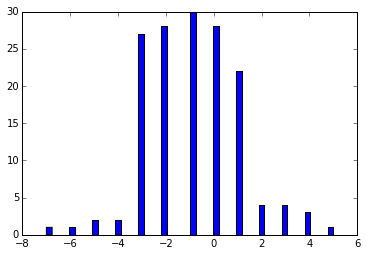

In [129]:
from matplotlib import pyplot as plt
%pylab inline
plt.hist(actual1-predict1,50)

# Create confusion matrix

In [130]:
predict1[0]

7.0

In [131]:
actual1[0]

6

In [132]:
n = 14
cm1 = np.zeros((n,n))
for i in xrange(len(actual1)):
    cm1[predict1[i],actual1[i]] +=1
print cm1
    

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2.  13.   1.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2.   6.   0.   1.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   7.   3.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.  17.  11.   3.   2.   2.   0.   1.   1.]
 [  0.   0.   0.   0.   0.   2.  24.   8.   8.   5.   4.   0.   2.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   1.   2.   0.   2.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   1.   2.   0.

In [133]:
#find TP
from collections import defaultdict
tp = defaultdict(list)
fp = defaultdict(list)
for i in range(0,14):
    for j in range(0,14):
        if i == j: 
            tp[i] = cm1[i,j]
            TP = tp[i]+tp[i-1]+tp[i-2]+tp[i-3]+tp[i-4]+tp[i-5]+tp[i-6]+tp[i-7]+tp[i-8]+tp[i-9]+tp[i-10]+tp[i-11]+tp[i-12]+tp[i-13]
        
            
print "TP is %f"%(TP)
print "--------------------------------------------"
sum = cm1.sum()
FP = sum-TP
print "FP is %f"%(FP)

precision = TP/(FP+TP)
print "precision is %f"%(precision)

TP is 28.000000
--------------------------------------------
FP is 125.000000
precision is 0.183007


# Training(2)

In [134]:
import pickle
from pforest.master import master
m=master(dsetname='CS213')
m.reset()
m.train()
with open('CS213/out_tree2.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)


master>>init() dsetname: CS213
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['CS213/dataset00.pic', 'CS213/dataset01.pic', 'CS213/dataset02.pic', 'CS213/dataset03.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.8257
master>>reset() Q: 00612
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17R-
master::train() node16R-
master::train() node15RG
master::train() node15LQ
master::train() node16LG
master::train() node17L-
master::train() node16R-
master::train() node15R-
master::train() node14R-
master::train() node13R-
master::train() node12RQ
master::train() node12L-
master::train() node11R-
master::train() node10RG
master::train() node10LG
master::train() node11LQ
master::train() node13LG
master::train() node14L-
master::train() node13R-
master::train() node12RG
master::train() node12LQ
master::train() node13LQ
master::train() node15LG
master::train() node16LG
master::train() node18L-

In [45]:
from pforest.dataset import dataset
from pforest.tree import tree
with open('CS213/out_tree2.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)
#init the test treetree213.pic
t=tree()
t.settree(root)
t.show()

*- 20 H:2.842e+00,Q:000306 tau:11.0 theta:[ 19.]
L- 19 H:2.603e+00,Q:000241 tau:10.0 theta:[ 189.]
L- 18 H:2.686e+00,Q:000083 tau:7.0 theta:[ 25.]
L- 17 H:2.350e+00,Q:000064 tau:7.0 theta:[ 98.]
L- 16 H:1.275e+00,Q:000010 tau:11.0 theta:[ 20.]
L- 15 H:1.094e+00,Q:000008 tau:7.0 theta:[ 22.]
LG 14 H:9.704e-36,Q:000002 (cl,P):(006,1.00) (013,0.00) (012,0.00)
R- 14 H:5.409e-01,Q:000006 tau:9.0 theta:[ 160.]
LG 13 H:5.000e-01,Q:000004 (cl,P):(009,0.50) (008,0.25) (007,0.25)
RG 13 H:9.704e-36,Q:000002 (cl,P):(007,1.00) (013,0.00) (012,0.00)
RG 15 H:9.704e-36,Q:000002 (cl,P):(010,1.00) (013,0.00) (012,0.00)
R- 16 H:2.189e+00,Q:000054 tau:9.0 theta:[ 20.]
L- 15 H:2.007e+00,Q:000024 tau:9.0 theta:[ 60.]
L- 14 H:1.869e+00,Q:000022 tau:8.0 theta:[ 20.]
L- 13 H:1.500e+00,Q:000012 tau:11.0 theta:[ 98.]
LG 12 H:1.206e+00,Q:000009 (cl,P):(007,0.44) (006,0.33) (008,0.11)
RG 12 H:9.183e-01,Q:000003 (cl,P):(005,0.67) (006,0.33) (013,0.00)
RG 13 H:1.751e+00,Q:000010 (cl,P):(009,0.30) (007,0.30) (005,0.2

In [49]:
with open('CS213/dataset04.pic', 'rb') as pickleFile:
     data = pickle.load(pickleFile)

In [50]:
I=data[-2];L=data[-3]

In [51]:
I

array([[0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 5, 0],
       ..., 
       [0, 0, 0, ..., 0, 9, 0],
       [0, 0, 0, ..., 0, 9, 0],
       [0, 0, 0, ..., 0, 6, 0]], dtype=int64)

In [52]:
L

array([ 9,  7, 10, 13,  7, 10,  9,  6,  9, 10,  8, 10,  7,  8,  7,  8,  9,
        9,  7,  9,  9,  8,  9,  8,  8, 10, 10, 11, 10,  7,  5,  6,  5,  9,
       10,  8, 11,  7,  8, 10,  7,  8, 10, 11,  9,  6,  8, 11, 11, 10,  7,
        9,  6,  9, 13,  9, 11,  9, 10,  9, 10,  9, 11, 12,  9, 10, 13, 12,
        9,  9, 12, 11,  9,  9,  8, 10,  9,  9, 13, 10,  9, 13,  9, 13,  9,
        8,  8, 11,  8, 10,  8, 10, 12,  9,  8,  9, 10, 12, 10,  9,  9,  9,
        7, 10, 11, 10,  8,  9,  8, 11, 11, 10,  8,  9,  8,  9, 10,  9, 10,
        9,  9, 11,  8,  9,  9, 10,  9,  9,  6,  7,  9,  8,  7,  7, 10,  8,
        7, 10,  9,  8,  9, 10,  9,  6, 11, 12,  6,  7,  7, 10, 10, 10,  6], dtype=int64)

In [53]:
i=0
actual2=np.array(L)
predict2=np.zeros(len(L))
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predict2[i]=np.argmax(Prob)
   
    print "actual grade:%d predicted grade:%d"%(actual2[i],predict2[i])

actual grade:9 predicted grade:9
actual grade:7 predicted grade:9
actual grade:10 predicted grade:10
actual grade:13 predicted grade:11
actual grade:7 predicted grade:9
actual grade:10 predicted grade:9
actual grade:9 predicted grade:9
actual grade:6 predicted grade:7
actual grade:9 predicted grade:7
actual grade:10 predicted grade:10
actual grade:8 predicted grade:10
actual grade:10 predicted grade:10
actual grade:7 predicted grade:7
actual grade:8 predicted grade:7
actual grade:7 predicted grade:7
actual grade:8 predicted grade:9
actual grade:9 predicted grade:9
actual grade:9 predicted grade:8
actual grade:7 predicted grade:7
actual grade:9 predicted grade:9
actual grade:9 predicted grade:8
actual grade:8 predicted grade:9
actual grade:9 predicted grade:9
actual grade:8 predicted grade:9
actual grade:8 predicted grade:10
actual grade:10 predicted grade:10
actual grade:10 predicted grade:10
actual grade:11 predicted grade:10
actual grade:10 predicted grade:10
actual grade:7 predicted

In [54]:
np.sqrt(np.sum((actual2-predict2)**2)/len(L))

1.1260434521851945

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([  1.,   0.,   0.,   0.,   0.,  17.,   0.,   0.,   0.,   0.,  22.,
          0.,   0.,   0.,   0.,  74.,   0.,   0.,   0.,   0.,  22.,   0.,
          0.,   0.,   0.,  16.,   0.,   0.,   0.,   1.]),
 array([-3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. ,
        -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,
         1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 30 Patch objects>)

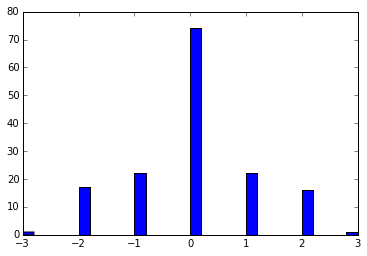

In [55]:
from matplotlib import pyplot as plt
%pylab inline
plt.hist(actual2-predict2,30)

In [56]:
n = 14
cm2 = np.zeros((n,n))
for i in xrange(len(actual2)):
    cm2[predict2[i],actual2[i]] +=1
print cm2

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   7.   8.   3.   6.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   5.   3.   2.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   7.  10.  34.  12.   5.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   6.   1.  17.   3.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   3.   0.   2.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [57]:
#find TP
from collections import defaultdict
tp = defaultdict(list)
fp = defaultdict(list)
for i in range(0,14):
    for j in range(0,14):
        if i == j: 
            tp[i] = cm2[i,j]
            TP = tp[i]+tp[i-1]+tp[i-2]+tp[i-3]+tp[i-4]+tp[i-5]+tp[i-6]+tp[i-7]+tp[i-8]+tp[i-9]+tp[i-10]+tp[i-11]+tp[i-12]+tp[i-13]
        
            
print "TP is %f"%(TP)
print "--------------------------------------------"
sum = cm2.sum()
FP = sum-TP
print "FP is %f"%(FP)

precision = TP/(FP+TP)
print "precision is %f"%(precision)

TP is 74.000000
--------------------------------------------
FP is 79.000000
precision is 0.483660


# Training(3)

In [58]:
import pickle
from pforest.master import master
m=master(dsetname='CS213')
m.reset()
m.train()
with open('CS213/out_tree3.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)

master>>init() dsetname: CS213
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['CS213/dataset00.pic', 'CS213/dataset01.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.7776
master>>reset() Q: 00306
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17R-
master::train() node16RG
master::train() node16L-
master::train() node15R-
master::train() node14R-
master::train() node13R-
master::train() node12R-
master::train() node11RG
master::train() node11LG
master::train() node12LG
master::train() node13LG
master::train() node14LG
master::train() node15LG
master::train() node17L-
master::train() node16R-
master::train() node15R-
master::train() node14RG
master::train() node14LG
master::train() node15L-
master::train() node14RQ
master::train() node14LG
master::train() node16L-
master::train() node15R-
master::train() node14RG
master::train() node14LG
master::train() node15LG
master::train() node

In [60]:
from pforest.dataset import dataset
from pforest.tree import tree
with open('CS213/out_tree3.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)
#init the test tree
t=tree()
t.settree(root)
t.show()

*- 20 H:2.778e+00,Q:000306 tau:9.0 theta:[ 22.]
L- 19 H:2.449e+00,Q:000098 tau:6.0 theta:[ 191.]
L- 18 H:1.995e+00,Q:000049 tau:7.0 theta:[ 160.]
L- 17 H:2.094e+00,Q:000016 tau:13.0 theta:[ 172.]
L- 16 H:2.004e+00,Q:000014 tau:11.0 theta:[ 19.]
LG 15 H:1.998e+00,Q:000013 (cl,P):(006,0.38) (010,0.15) (008,0.15)
RQ 15 H:1.925e-35,Q:000001 (cl,P):(010,1.00) (013,0.00) (012,0.00)
RQ 16 H:1.925e-35,Q:000002 (cl,P):(007,1.00) (013,0.00) (012,0.00)
RG 17 H:1.641e+00,Q:000033 (cl,P):(009,0.36) (006,0.27) (007,0.24)
R- 18 H:2.393e+00,Q:000049 tau:5.0 theta:[ 130.]
L- 17 H:1.841e+00,Q:000023 tau:10.0 theta:[ 102.]
L- 16 H:1.835e+00,Q:000020 tau:8.0 theta:[ 22.]
LG 15 H:6.667e-01,Q:000003 (cl,P):(007,0.67) (008,0.33) (013,0.00)
R- 15 H:1.829e+00,Q:000017 tau:12.0 theta:[ 169.]
L- 14 H:1.846e+00,Q:000015 tau:11.0 theta:[ 98.]
L- 13 H:1.786e+00,Q:000013 tau:8.0 theta:[ 201.]
L- 12 H:1.268e+00,Q:000006 tau:7.0 theta:[ 160.]
LG 11 H:6.887e-01,Q:000004 (cl,P):(007,0.75) (006,0.25) (013,0.00)
RG 11 H:9

In [61]:
with open('CS213/dataset04.pic', 'rb') as pickleFile:
     data = pickle.load(pickleFile)
I=data[-2];L=data[-3]

In [62]:
I

array([[ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0, 13,  0],
       [ 0,  0,  0, ...,  0, 11,  0],
       ..., 
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  5,  0]], dtype=int64)

In [63]:
L

array([10, 13,  9, 11,  9,  8,  9,  9,  9,  6,  6,  9, 10,  7,  8, 10, 12,
       10,  9,  6,  9,  9,  8, 10,  8, 12,  9,  9,  9,  8,  9,  9,  6,  8,
        6,  9,  9, 12,  9, 11,  8,  9,  7,  9,  9,  6,  9,  8,  9, 10, 10,
        8,  9,  8, 13, 10,  6,  8,  8,  9,  7, 13,  7,  9,  9,  8,  9,  7,
       13, 13, 13, 11, 13, 11,  9,  9,  9,  7, 11,  9, 10,  9,  9,  9, 10,
       10, 10, 10, 11, 10,  5,  6,  8,  5,  5,  6,  7, 12, 11,  9,  9,  9,
        9,  9,  9, 12, 13,  5, 10, 11, 10, 12, 10,  9, 10,  9, 11,  8, 13,
       13, 11,  6,  9, 12,  9,  8,  8,  8, 10, 10,  8, 10, 13,  9,  9,  8,
       13,  8, 13,  8, 10,  8,  9,  6,  8, 11,  9,  9,  6,  5,  7,  9,  7], dtype=int64)

In [64]:
i=0
actual3=np.array(L)
predict3=np.zeros(len(L))
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predict3[i]=np.argmax(Prob)
   
    print "actual grade:%d predicted grade:%d"%(actual3[i],predict3[i])

actual grade:10 predicted grade:10
actual grade:13 predicted grade:11
actual grade:9 predicted grade:9
actual grade:11 predicted grade:9
actual grade:9 predicted grade:9
actual grade:8 predicted grade:9
actual grade:9 predicted grade:9
actual grade:9 predicted grade:9
actual grade:9 predicted grade:9
actual grade:6 predicted grade:9
actual grade:6 predicted grade:9
actual grade:9 predicted grade:9
actual grade:10 predicted grade:10
actual grade:7 predicted grade:9
actual grade:8 predicted grade:9
actual grade:10 predicted grade:9
actual grade:12 predicted grade:12
actual grade:10 predicted grade:10
actual grade:9 predicted grade:9
actual grade:6 predicted grade:8
actual grade:9 predicted grade:10
actual grade:9 predicted grade:9
actual grade:8 predicted grade:9
actual grade:10 predicted grade:9
actual grade:8 predicted grade:9
actual grade:12 predicted grade:9
actual grade:9 predicted grade:9
actual grade:9 predicted grade:9
actual grade:9 predicted grade:9
actual grade:8 predicted gra

In [65]:
np.sqrt(np.sum((actual3-predict3)**2)/len(L))

1.5801050680710416

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([  4.,   0.,   0.,  11.,   0.,   0.,  10.,   0.,   0.,   0.,  22.,
          0.,   0.,  76.,   0.,   0.,  14.,   0.,   0.,   0.,   8.,   0.,
          0.,   5.,   0.,   0.,   1.,   0.,   0.,   2.]),
 array([-4. , -3.7, -3.4, -3.1, -2.8, -2.5, -2.2, -1.9, -1.6, -1.3, -1. ,
        -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ,  2.3,
         2.6,  2.9,  3.2,  3.5,  3.8,  4.1,  4.4,  4.7,  5. ]),
 <a list of 30 Patch objects>)

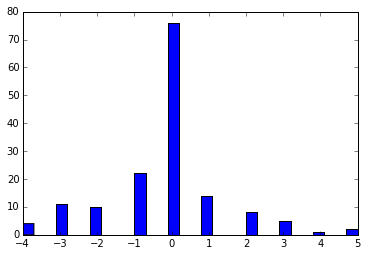

In [66]:
from matplotlib import pyplot as plt
%pylab inline
plt.hist(actual3-predict3,30)

In [67]:
n = 14
cm3 = np.zeros((n,n))
for i in xrange(len(actual3)):
    cm3[predict3[i],actual3[i]] +=1
print cm3

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   1.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   3.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   1.   0.   5.   0.   0.   1.   0.   1.]
 [  0.   0.   0.   0.   0.   4.  10.   6.  14.  45.  10.   6.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   3.   5.  12.   2.   0.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   3.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [68]:
#find TP
from collections import defaultdict
tp = defaultdict(list)
fp = defaultdict(list)
for i in range(0,14):
    for j in range(0,14):
        if i == j: 
            tp[i] = cm3[i,j]
            TP = tp[i]+tp[i-1]+tp[i-2]+tp[i-3]+tp[i-4]+tp[i-5]+tp[i-6]+tp[i-7]+tp[i-8]+tp[i-9]+tp[i-10]+tp[i-11]+tp[i-12]+tp[i-13]
        
            
print "TP is %f"%(TP)
print "--------------------------------------------"
sum = cm3.sum()
FP = sum-TP
print "FP is %f"%(FP)

precision = TP/(FP+TP)
print "precision is %f"%(precision)

TP is 76.000000
--------------------------------------------
FP is 77.000000
precision is 0.496732


# Training(4)

In [69]:
import pickle
from pforest.master import master
m=master(dsetname='CS213')
m.reset()
m.train()
with open('CS213/out_tree4.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)

master>>init() dsetname: CS213
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['CS213/dataset00.pic', 'CS213/dataset01.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.8089
master>>reset() Q: 00306
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17R-
master::train() node16RG
master::train() node16LG
master::train() node17LG
master::train() node18L-
master::train() node17R-
master::train() node16RG
master::train() node16LQ
master::train() node17L-
master::train() node16RG
master::train() node16L-
master::train() node15RG
master::train() node15LQ
master::train() node19L-
master::train() node18R-
master::train() node17R-
master::train() node16R-
master::train() node15R-
master::train() node14R-
master::train() node13RG
master::train() node13LQ
master::train() node14L-
master::train() node13RG
master::train() node13L-
master::train() node12RQ
master::train() node12L-
master::train() node

In [70]:
from pforest.dataset import dataset
from pforest.tree import tree
with open('CS213/out_tree4.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)
#init the test tree
t=tree()
t.settree(root)
t.show()

*- 20 H:2.809e+00,Q:000306 tau:10.0 theta:[ 22.]
L- 19 H:2.603e+00,Q:000216 tau:7.0 theta:[ 35.]
L- 18 H:2.342e+00,Q:000148 tau:7.0 theta:[ 201.]
L- 17 H:2.111e+00,Q:000028 tau:12.0 theta:[ 196.]
L- 16 H:1.708e+00,Q:000012 tau:10.0 theta:[ 162.]
LG 15 H:9.183e-01,Q:000006 (cl,P):(007,0.33) (005,0.33) (011,0.17)
R- 15 H:1.602e+00,Q:000006 tau:8.0 theta:[ 20.]
LG 14 H:9.183e-01,Q:000003 (cl,P):(009,0.67) (005,0.33) (013,0.00)
RG 14 H:6.667e-01,Q:000003 (cl,P):(010,0.33) (008,0.33) (007,0.33)
RG 16 H:1.732e+00,Q:000016 (cl,P):(008,0.38) (007,0.25) (009,0.19)
R- 17 H:2.247e+00,Q:000120 tau:11.0 theta:[ 19.]
L- 16 H:2.297e+00,Q:000105 tau:10.0 theta:[ 20.]
L- 15 H:2.181e+00,Q:000085 tau:9.0 theta:[ 98.]
L- 14 H:2.087e+00,Q:000034 tau:10.0 theta:[ 160.]
L- 13 H:1.752e+00,Q:000025 tau:12.0 theta:[ 196.]
L- 12 H:1.515e+00,Q:000013 tau:11.0 theta:[ 26.]
LG 11 H:1.200e+00,Q:000010 (cl,P):(009,0.60) (008,0.20) (005,0.20)
RG 11 H:1.585e+00,Q:000003 (cl,P):(009,0.33) (006,0.33) (005,0.33)
RG 12 H:1

In [71]:
with open('CS213/dataset04.pic', 'rb') as pickleFile:
     data = pickle.load(pickleFile)
I=data[-2];L=data[-3]

In [72]:
I

array([[0, 0, 0, ..., 0, 9, 0],
       [0, 0, 0, ..., 0, 7, 0],
       [0, 0, 0, ..., 0, 7, 0],
       ..., 
       [0, 0, 0, ..., 0, 6, 0],
       [0, 0, 0, ..., 0, 6, 0],
       [0, 0, 0, ..., 0, 7, 0]], dtype=int64)

In [73]:
L

array([ 9,  8,  6, 10,  6,  9,  9,  5,  8,  9,  6, 12,  8, 11,  9,  5,  7,
        9,  8,  9, 10,  9,  9,  9,  7, 10, 13,  9, 12,  9, 10, 10, 11,  5,
        8, 11,  9, 12, 12,  9, 11, 12,  9,  8, 11,  8,  9,  7, 10, 12, 13,
       13, 13,  9,  9,  9,  6,  8,  9,  8, 12,  5,  5,  6,  8, 11,  9, 13,
       11,  8, 11, 10, 10,  9, 11, 10, 10,  8,  9,  9, 13,  9,  7, 10, 12,
        9,  5,  5,  9, 11,  9,  8, 11,  8, 10,  9,  8,  9,  8,  9,  7, 10,
        7, 10, 10, 10,  9,  9,  9,  7, 11,  9,  7,  7, 10, 11, 11,  6,  9,
        9,  8,  9,  9,  8, 12,  9,  9,  9,  7,  9,  8,  8,  5,  8, 13,  8,
       11,  9,  8, 10,  8, 10,  9,  8, 11, 10,  9,  9,  9,  9,  8,  9,  8], dtype=int64)

In [74]:
i=0
actual4=np.array(L)
predict4=np.zeros(len(L))
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predict4[i]=np.argmax(Prob)
   
    print "actual grade:%d predicted grade:%d"%(actual4[i],predict4[i])

actual grade:9 predicted grade:9
actual grade:8 predicted grade:9
actual grade:6 predicted grade:6
actual grade:10 predicted grade:9
actual grade:6 predicted grade:8
actual grade:9 predicted grade:9
actual grade:9 predicted grade:5
actual grade:5 predicted grade:9
actual grade:8 predicted grade:8
actual grade:9 predicted grade:9
actual grade:6 predicted grade:9
actual grade:12 predicted grade:9
actual grade:8 predicted grade:9
actual grade:11 predicted grade:11
actual grade:9 predicted grade:9
actual grade:5 predicted grade:8
actual grade:7 predicted grade:8
actual grade:9 predicted grade:9
actual grade:8 predicted grade:8
actual grade:9 predicted grade:9
actual grade:10 predicted grade:9
actual grade:9 predicted grade:9
actual grade:9 predicted grade:9
actual grade:9 predicted grade:9
actual grade:7 predicted grade:9
actual grade:10 predicted grade:11
actual grade:13 predicted grade:9
actual grade:9 predicted grade:9
actual grade:12 predicted grade:9
actual grade:9 predicted grade:9
a

In [75]:
np.sqrt(np.sum((actual4-predict4)**2)/len(L))

1.6329931618554521

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([  3.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   8.,
          0.,   0.,   0.,   0.,  23.,   0.,   0.,   0.,   0.,  79.,   0.,
          0.,   0.,   0.,  11.,   0.,   0.,   0.,   0.,   9.,   0.,   0.,
          0.,   0.,   8.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
        -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
         0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
         2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,
         4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ]),
 <a list of 50 Patch objects>)

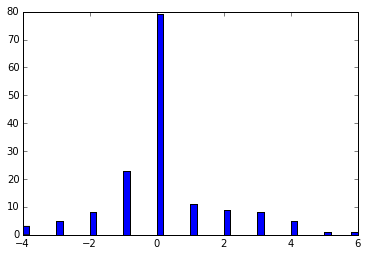

In [76]:
from matplotlib import pyplot as plt
%pylab inline
plt.hist(actual4-predict4,50)

In [77]:
n = 14
cm4 = np.zeros((n,n))
for i in xrange(len(actual4)):
    cm4[predict4[i],actual4[i]] +=1
print cm4

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   3.   1.   0.   0.   2.   1.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2.   1.   3.   9.   2.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   3.   3.   6.  18.  45.   7.   3.   6.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   8.   0.   2.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.  12.   1.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [78]:
#find TP
from collections import defaultdict
tp = defaultdict(list)
fp = defaultdict(list)
for i in range(0,14):
    for j in range(0,14):
        if i == j: 
            tp[i] = cm4[i,j]
            TP = tp[i]+tp[i-1]+tp[i-2]+tp[i-3]+tp[i-4]+tp[i-5]+tp[i-6]+tp[i-7]+tp[i-8]+tp[i-9]+tp[i-10]+tp[i-11]+tp[i-12]+tp[i-13]
        
            
print "TP is %f"%(TP)
print "--------------------------------------------"
sum = cm4.sum()
FP = sum-TP
print "FP is %f"%(FP)

precision = TP/(FP+TP)
print "precision is %f"%(precision)

TP is 79.000000
--------------------------------------------
FP is 74.000000
precision is 0.516340


# Traing(5)

In [79]:
import pickle
from pforest.master import master
m=master(dsetname='CS213')
m.reset()
m.train()
with open('CS213/out_tree5.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)

master>>init() dsetname: CS213
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['CS213/dataset00.pic', 'CS213/dataset01.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.8737
master>>reset() Q: 00306
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17RG
master::train() node17L-
master::train() node16RG
master::train() node16LQ
master::train() node18L-
master::train() node17RG
master::train() node17L-
master::train() node16RG
master::train() node16LG
master::train() node19L-
master::train() node18R-
master::train() node17R-
master::train() node16R-
master::train() node15R-
master::train() node14R-
master::train() node13R-
master::train() node12R-
master::train() node11RG
master::train() node11L-
master::train() node10RG
master::train() node10LG
master::train() node12LQ
master::train() node13L-
master::train() node12RQ
master::train() node12LG
master::train() node14LG
master::train() node

In [80]:
from pforest.dataset import dataset
from pforest.tree import tree
with open('CS213/out_tree5.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)
#init the test tree
t=tree()
t.settree(root)
t.show()

*- 20 H:2.874e+00,Q:000306 tau:11.0 theta:[ 22.]
L- 19 H:2.740e+00,Q:000270 tau:9.0 theta:[ 31.]
L- 18 H:2.575e+00,Q:000198 tau:9.0 theta:[ 22.]
L- 17 H:2.399e+00,Q:000120 tau:13.0 theta:[ 178.]
L- 16 H:2.292e+00,Q:000092 tau:10.0 theta:[ 19.]
L- 15 H:2.301e+00,Q:000063 tau:9.0 theta:[ 160.]
L- 14 H:1.817e+00,Q:000021 tau:8.0 theta:[ 20.]
LG 13 H:7.763e-36,Q:000005 (cl,P):(009,0.80) (008,0.20) (013,0.00)
RG 13 H:1.601e+00,Q:000016 (cl,P):(008,0.38) (006,0.25) (007,0.19)
R- 14 H:2.256e+00,Q:000042 tau:10.0 theta:[ 160.]
LG 13 H:2.158e+00,Q:000025 (cl,P):(007,0.28) (008,0.24) (009,0.20)
R- 13 H:1.880e+00,Q:000017 tau:9.0 theta:[ 19.]
LG 12 H:1.000e+00,Q:000002 (cl,P):(007,0.50) (005,0.50) (013,0.00)
RG 12 H:1.763e+00,Q:000015 (cl,P):(008,0.40) (009,0.33) (010,0.13)
R- 15 H:1.790e+00,Q:000029 tau:7.0 theta:[ 22.]
LG 14 H:6.667e-01,Q:000003 (cl,P):(009,0.33) (007,0.33) (005,0.33)
R- 14 H:1.693e+00,Q:000026 tau:9.0 theta:[ 199.]
L- 13 H:1.308e+00,Q:000022 tau:7.0 theta:[ 125.]
L- 12 H:1.397

In [81]:
with open('CS213/dataset04.pic', 'rb') as pickleFile:
     data = pickle.load(pickleFile)
I=data[-2];L=data[-3]

In [82]:
I

array([[ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0, 13,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       ..., 
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  9,  0]], dtype=int64)

In [83]:
L

array([ 9, 10,  8, 10,  9,  5,  7,  9,  6,  6,  8, 11,  7, 11,  9,  8, 12,
        9,  6, 11,  9,  5,  8, 11, 13, 11,  7, 12,  7, 12, 12, 12,  8,  9,
        7,  7,  9,  9,  7, 11, 13, 13,  9,  9, 13, 10, 10, 10,  8, 11,  8,
       13,  9,  9,  9, 13, 11, 13,  8, 10,  7,  8,  9, 12, 12, 13,  9, 10,
        8,  9,  8, 12,  5,  9, 10, 12, 11, 10, 11,  9, 10,  7,  8,  9,  9,
        6, 10,  7, 10,  9, 11,  5,  7,  8, 10, 10, 11,  5,  7,  9,  8,  6,
       10,  8, 10,  8,  9,  8,  6,  9,  8, 11,  5,  7,  7,  8,  8, 11,  9,
        9, 11,  9, 10,  8, 10,  7,  5,  9,  9,  9,  5,  7,  8,  8, 10,  8,
       10,  8, 11,  5,  9, 10,  8, 10,  9,  9,  7, 10,  9, 10,  7, 11,  9], dtype=int64)

In [84]:
i=0
actual5=np.array(L)
predict5=np.zeros(len(L))
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predict5[i]=np.argmax(Prob)
   
    print "actual grade:%d predicted grade:%d"%(actual5[i],predict5[i])

actual grade:9 predicted grade:8
actual grade:10 predicted grade:11
actual grade:8 predicted grade:7
actual grade:10 predicted grade:10
actual grade:9 predicted grade:9
actual grade:5 predicted grade:8
actual grade:7 predicted grade:8
actual grade:9 predicted grade:8
actual grade:6 predicted grade:8
actual grade:6 predicted grade:8
actual grade:8 predicted grade:8
actual grade:11 predicted grade:11
actual grade:7 predicted grade:7
actual grade:11 predicted grade:11
actual grade:9 predicted grade:9
actual grade:8 predicted grade:9
actual grade:12 predicted grade:12
actual grade:9 predicted grade:9
actual grade:6 predicted grade:9
actual grade:11 predicted grade:11
actual grade:9 predicted grade:9
actual grade:5 predicted grade:5
actual grade:8 predicted grade:9
actual grade:11 predicted grade:10
actual grade:13 predicted grade:13
actual grade:11 predicted grade:9
actual grade:7 predicted grade:5
actual grade:12 predicted grade:8
actual grade:7 predicted grade:9
actual grade:12 predicted

In [85]:
np.sqrt(np.sum((actual5-predict5)**2)/len(L))

1.4596982408184118

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([  1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          9.,   0.,   0.,   0.,   0.,  15.,   0.,   0.,   0.,   0.,   0.,
         76.,   0.,   0.,   0.,   0.,  21.,   0.,   0.,   0.,   0.,   0.,
         17.,   0.,   0.,   0.,   0.,   7.,   0.,   0.,   0.,   0.,   0.,
          4.,   0.,   0.,   0.,   0.,   1.]),
 array([-4.  , -3.82, -3.64, -3.46, -3.28, -3.1 , -2.92, -2.74, -2.56,
        -2.38, -2.2 , -2.02, -1.84, -1.66, -1.48, -1.3 , -1.12, -0.94,
        -0.76, -0.58, -0.4 , -0.22, -0.04,  0.14,  0.32,  0.5 ,  0.68,
         0.86,  1.04,  1.22,  1.4 ,  1.58,  1.76,  1.94,  2.12,  2.3 ,
         2.48,  2.66,  2.84,  3.02,  3.2 ,  3.38,  3.56,  3.74,  3.92,
         4.1 ,  4.28,  4.46,  4.64,  4.82,  5.  ]),
 <a list of 50 Patch objects>)

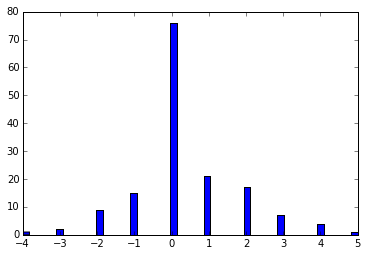

In [86]:
from matplotlib import pyplot as plt
%pylab inline
plt.hist(actual5-predict5,50)

In [87]:
n = 14
cm5 = np.zeros((n,n))
for i in xrange(len(actual5)):
    cm5[predict5[i],actual5[i]] +=1
print cm5

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   7.   0.   3.   2.   1.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   9.   5.   3.   2.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   4.   4.  11.   6.   2.   2.   1.   0.]
 [  0.   0.   0.   0.   0.   1.   1.   2.   6.  24.   7.   5.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   2.   1.  10.   1.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.   8.   2.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   4.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [88]:
#find TP
from collections import defaultdict
tp = defaultdict(list)
fp = defaultdict(list)
for i in range(0,14):
    for j in range(0,14):
        if i == j: 
            tp[i] = cm5[i,j]
            TP = tp[i]+tp[i-1]+tp[i-2]+tp[i-3]+tp[i-4]+tp[i-5]+tp[i-6]+tp[i-7]+tp[i-8]+tp[i-9]+tp[i-10]+tp[i-11]+tp[i-12]+tp[i-13]
        
            
print "TP is %f"%(TP)
print "--------------------------------------------"
sum = cm5.sum()
FP = sum-TP
print "FP is %f"%(FP)

precision = TP/(FP+TP)
print "precision is %f"%(precision)

TP is 76.000000
--------------------------------------------
FP is 77.000000
precision is 0.496732


# Find Precision

In [92]:
print cm1

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.  10.   1.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   4.  20.   7.   2.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   3.  32.  13.  11.   6.   4.   2.   2.   5.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   1.   0.   2.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   4.   4.   2.   3.   1.   1.   1.   6.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [93]:
print cm2

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   7.   8.   3.   6.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   5.   3.   2.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   7.  10.  34.  12.   5.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   6.   1.  17.   3.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   3.   0.   2.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [94]:
print cm3

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   1.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   3.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   1.   0.   5.   0.   0.   1.   0.   1.]
 [  0.   0.   0.   0.   0.   4.  10.   6.  14.  45.  10.   6.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   3.   5.  12.   2.   0.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   3.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [95]:
print cm4

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   3.   1.   0.   0.   2.   1.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2.   1.   3.   9.   2.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   3.   3.   6.  18.  45.   7.   3.   6.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   8.   0.   2.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.  12.   1.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [96]:
print cm5

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   7.   0.   3.   2.   1.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   9.   5.   3.   2.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   4.   4.  11.   6.   2.   2.   1.   0.]
 [  0.   0.   0.   0.   0.   1.   1.   2.   6.  24.   7.   5.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   2.   1.  10.   1.   1.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.   8.   2.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   4.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [97]:
cm = cm1+cm2+cm3+cm4+cm5

In [98]:
print cm

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.]
 [   0.    0.    0.    0.    0.   12.    2.    3.    2.    3.    2.    1.
     0.    0.]
 [   0.    0.    0.    0.    0.    0.    2.    0.    1.    0.    0.    1.
     0.    0.]
 [   0.    0.    0.    0.    0.    1.   18.   22.    9.   10.    3.    1.
     0.    0.]
 [   0.    0.    0.    0.    0.    8.   26.   15.   32.   12.    5.    3.
     1.    1.]
 [   0.    0.    0.    0.    0.   11.   46.   34.   59.  154.   40.   21.
    10.   10.]
 [   0.    0.    0.    0.    0.    0.    1.    0.   12.    7.   49.    6.
     4.    5.]
 [   0.    0.    0.  

# Find Precision

In [99]:
#find TP
from collections import defaultdict
tp = defaultdict(list)
fp = defaultdict(list)
for i in range(0,14):
    for j in range(0,14):
        if i == j: 
            tp[i] = cm[i,j]
            TP = tp[i]+tp[i-1]+tp[i-2]+tp[i-3]+tp[i-4]+tp[i-5]+tp[i-6]+tp[i-7]+tp[i-8]+tp[i-9]+tp[i-10]+tp[i-11]+tp[i-12]+tp[i-13]
        
            
print "TP is %f"%(TP)
print "--------------------------------------------"
sum = cm.sum()
FP = sum-TP
print "FP is %f"%(FP)

precision = TP/(FP+TP)
print "precision is %f"%(precision)

TP is 317.000000
--------------------------------------------
FP is 448.000000
precision is 0.414379


In [100]:
cm.sum()

765.0